# Tarea - Ajuste de curvas

### Ana Luisa Espinoza López
**Exp. 734753**

**02/03/2023**

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [172]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

### Solución ajuste de grado 1

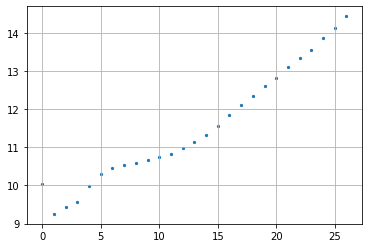

In [173]:
%matplotlib inline
x=np.linspace(0,26,len(data))
y=data
plt.figure()
plt.scatter(x,y,s=5)
plt.grid()

In [273]:
def f_costo(beta,X,y):
    m,n = X.shape
    beta = np.reshape(beta, [n,1])
    prediccion = X @ beta #multiplicación de vectores en numpy
    error = prediccion - y
    return (error.T @ error)[0][0]  #.T es para transponer

In [175]:
m=len(y)
ones=np.ones([m,1]) #matriz de 1
x1 = np.reshape(x,[m,1]) #reacomodo como vector
X = np.hstack((ones, x1)) #concatena columnas

In [176]:
beta_inicial = np.random.rand(2,1)
beta_inicial

array([[0.57059636],
       [0.92031405]])

In [177]:
y1=np.reshape(y,[m,1])

In [178]:
import scipy.optimize as opt
sol = opt.minimize(f_costo,beta_inicial, args=(X,y1))
beta=np.reshape(sol.x,[2,1])
sol

      fun: 2.3704889518161596
 hess_inv: array([[ 0.07010582, -0.00396825],
       [-0.00396825,  0.00030525]])
      jac: array([2.05636024e-06, 9.83476639e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([9.11567647, 0.18667055])

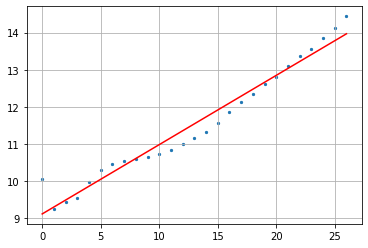

In [179]:
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(X@sol.x,"r")
plt.grid()


### Solución ajuste grado 2

In [180]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1]) # da forma a las x en 1 columna
x2=np.reshape(x**2,[m,1])
X2=np.hstack((ones,x1,x2))

In [181]:
beta_inicial2 = np.random.rand(3,1)
y2=np.reshape(y,[m,1])

In [182]:
sol2=opt.minimize(f_costo,beta_inicial2, args=(X2,y2))
sol2

      fun: 0.8443845194032631
 hess_inv: array([[ 1.44229954e-01, -2.17576353e-02,  6.84195854e-04],
       [-2.17576353e-02,  4.57464146e-03, -1.64205713e-04],
       [ 6.84195854e-04, -1.64205713e-04,  6.31556907e-06]])
      jac: array([1.49011612e-08, 3.72529030e-08, 6.03497028e-07])
  message: 'Optimization terminated successfully.'
     nfev: 65
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([9.59128645e+00, 7.25241277e-02, 4.39024721e-03])

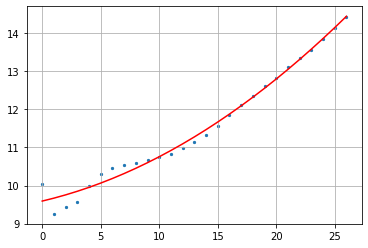

In [183]:
plt.figure()
plt.scatter(x,y,s=5)
beta2=np.reshape(sol2.x,[3,1])
plt.plot(x,X2@beta2,"r") #modelo de regresión
plt.grid()

### Solución ajuste grado 3

In [184]:
type(x)

numpy.ndarray

In [185]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1]) # da forma a las x en 1 columna
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
X3=np.hstack((ones,x1,x2,x3))

In [186]:
beta_inicial3 = np.random.rand(4,1)
y3=np.reshape(y,[m,1])

In [187]:
sol3=opt.minimize(f_costo,beta_inicial3, args=(X3,y3))
sol3

      fun: 0.8404346758255801
 hess_inv: array([[ 2.27239686e-01, -6.41154302e-02,  4.83488289e-03,
        -1.06428225e-04],
       [-6.41154302e-02,  2.61883136e-02, -2.28213720e-03,
         5.43059926e-05],
       [ 4.83488289e-03, -2.28213720e-03,  2.13851605e-04,
        -5.32143299e-06],
       [-1.06428225e-04,  5.43059926e-05, -5.32143299e-06,
         1.36446772e-07]])
      jac: array([0.0000000e+00, 0.0000000e+00, 3.7252903e-08, 1.5348196e-06])
  message: 'Optimization terminated successfully.'
     nfev: 114
      nit: 9
     njev: 19
   status: 0
  success: True
        x: array([9.56752299e+00, 8.46495840e-02, 3.20207437e-03, 3.04659701e-05])

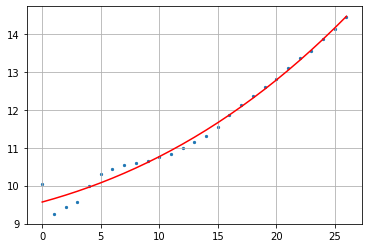

In [188]:
plt.figure()
plt.scatter(x,y,s=5)
beta3=np.reshape(sol3.x,[4,1])
plt.plot(x,X3@beta3,"r") #modelo de regresión
plt.grid()

In [189]:
sol.fun>sol2.fun 

True

In [190]:
sol2.fun>sol3.fun

True

#### Mejor ajuste
El ajuste con menor error para los datos es el de grado 3

### Gráfico con el ajuste de curvas de grado 1, 2 y 3

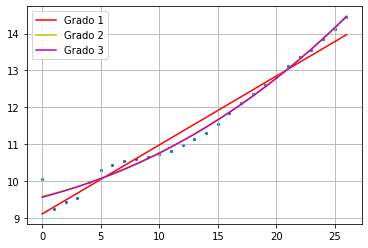

In [191]:
%matplotlib inline
x=np.linspace(0,26,len(data))
y=data
plt.figure()
plt.scatter(x,y,s=5)
plt.plot(X@sol.x,"r",label="Grado 1")
plt.plot(x,X2@sol2.x,"y",label="Grado 2")
plt.plot(x,X3@sol3.x,"m",label="Grado 3")
plt.legend(loc="best")
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [192]:
popdata = pd.read_csv("population_data.csv")
popdata

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [193]:
year=popdata["Year"]
population=popdata["Poblacion"]

In [194]:
x=np.array(year)
y=np.array(population)

#### Grado 1

In [196]:
m=len(yp)
ones=np.ones([m,1]) #matriz de 1
x1 = np.reshape(x,[m,1]) #reacomodo como vector
X=np.hstack((ones,x1))

In [197]:
beta_i1=np.random.rand(2,1)
yv=np.reshape(y,[m,1]) # y vectorizada

In [198]:
solp1=opt.minimize(f_costo,beta_i1, args=(X,yv))
solp1

      fun: 212137198.10353658
 hess_inv: array([[ 7.08557018e+01, -3.57372602e-02],
       [-3.57372602e-02,  1.80265827e-05]])
      jac: array([-1.400e+01, -2.958e+04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 404
      nit: 9
     njev: 98
   status: 2
  success: False
        x: array([-2.98667757e+06,  1.54400736e+03])

#### Grado 2

In [199]:
x2=np.reshape(x**2,[m,1])
X2=np.hstack((ones,x1,x2))
beta_i2=np.random.rand(3,1)

In [200]:
solp2=opt.minimize(f_costo,beta_i2, args=(X2,yv))
solp2

      fun: 211770218.1843843
 hess_inv: array([[-9.43960313e+00,  9.45643476e-03, -2.36795451e-06],
       [ 9.45643476e-03,  1.14250015e-05, -8.16613719e-09],
       [-2.36795451e-06, -8.16613719e-09,  4.72059645e-12]])
      jac: array([8.0000000e+00, 6.7400000e+03, 1.3368174e+07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 337
      nit: 5
     njev: 65
   status: 2
  success: False
        x: array([-1.98543675e+01, -1.46904795e+03,  7.59851439e-01])

#### Grado 3 

In [203]:
m=len(yp)
ones=np.ones([m,1]) #matriz de 1
x1 = np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
X3=np.hstack((ones,x1,x2,x3))
beta_i3=np.random.rand(4,1)
solp3=opt.minimize(f_costo,beta_i3, args=(X3,yv))
solp3

      fun: 36316980738.11939
 hess_inv: array([[ 1.00000000e+00, -7.15927212e-10, -7.34972948e-07,
         3.70560532e-10],
       [-7.15927212e-10,  9.99998996e-01, -1.00879885e-03,
         2.54482569e-07],
       [-7.34972948e-07, -1.00879885e-03,  1.01768201e-06,
        -2.56724935e-10],
       [ 3.70560532e-10,  2.54482569e-07, -2.56724935e-10,
         6.47629321e-14]])
      jac: array([9.16480000e+04, 1.21903616e+08, 1.25168804e+11, 7.69314673e+13])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 245
      nit: 2
     njev: 39
   status: 2
  success: False
        x: array([ 3.92477850e-01,  4.39288105e-01, -1.03015503e-01,  6.14648189e-05])

In [207]:
beta=np.reshape(solp1.x,[2,1])
beta2=np.reshape(solp2.x,[3,1])
beta3=np.reshape(solp3.x,[4,1])

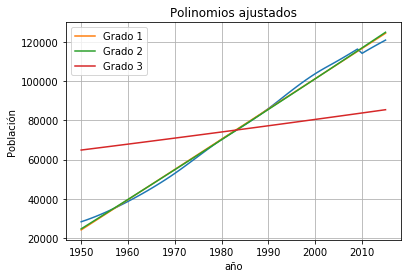

In [209]:
plt.figure()
plt.title("Polinomios ajustados")
plt.plot(x,y)
plt.plot(x,X@beta,label="Grado 1")
plt.plot(x,X2@beta2,label="Grado 2")
plt.plot(x,X3@beta3,label="Grado 3")
plt.legend(loc="best")
plt.xlabel("año")
plt.ylabel("Población")
plt.grid()

In [315]:
error=np.array([solp1.fun,solp2.fun,solp3.fun])
e=np.reshape(error,[3,1])


In [215]:
nterminos=np.array([len(solp1.x),len(solp2.x),len(solp3.x)])
nt=np.reshape(nterminos,[3,1])


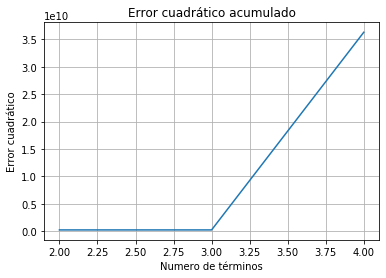

In [219]:
plt.figure()
plt.plot(nt,e)
plt.title("Error cuadrático acumulado")
plt.xlabel("Numero de términos")
plt.ylabel("Error cuadrático")
plt.grid()

In [313]:
solp1.fun>solp2.fun

True

In [314]:
solp3.fun>solp2.fun

True

**MEJOR AJUSTE**

Para los datos de población, el mejor ajuste fue de grado 2

### Nacimientos como variable dependiente

In [220]:
year=popdata["Year"]
population=popdata["Nacimientos"]
x=np.array(year)
y=np.array(population)

#### Grado 1

In [242]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
X=np.hstack((ones,x1))
beta_i1=np.random.rand(2,1)
yv=np.reshape(y,[m,1])
soln1=opt.minimize(f_costo,beta_i1, args=(X,yv))
soln1

      fun: 4752076200269.235
 hess_inv: array([[ 7.77023208e-09, -3.86232336e-09],
       [-3.86232336e-09,  1.93115076e-09]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 252
      nit: 14
     njev: 63
   status: 0
  success: True
        x: array([-3.97663504e+07,  2.12074227e+04])

#### Grado 2

In [299]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
X2=np.hstack((ones,x1,x2))
beta_i2=np.random.rand(3,1)


In [300]:
soln2=opt.minimize(f_costo,beta_i2,args=(X2,yv))
soln2

      fun: 4852105492313.903
 hess_inv: array([[ 8.83492201e-01, -9.07009031e-04,  2.32695632e-07],
       [-9.07009031e-04,  2.17874330e-05, -1.07560552e-08],
       [ 2.32695632e-07, -1.07560552e-08,  5.36525341e-12]])
      jac: array([-6.55360000e+04, -1.06364928e+08, -2.12567523e+11])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 191
      nit: 4
     njev: 36
   status: 2
  success: False
        x: array([-1.44038597e+05, -1.94040030e+04,  1.04026350e+01])

#### Grado 3

In [303]:
m=len(y)
ones=np.ones([m,1])
x1=np.reshape(x,[m,1])
x2=np.reshape(x**2,[m,1])
x3=np.reshape(x**3,[m,1])
X3=np.hstack((ones,x1,x2,x3))
beta_i3=np.random.rand(4,1)
soln3=opt.minimize(f_costo,beta_i3, args=(X3,yv))
soln3

      fun: 2504383207079.5195
 hess_inv: array([[ 1.29526451e-01, -4.61375168e-02,  4.64136908e-05,
        -1.16882081e-08],
       [-4.61387462e-02,  1.83704694e-02, -1.84645958e-05,
         4.64553789e-09],
       [ 4.64149267e-05, -1.84645966e-05,  1.85636720e-08,
        -4.67159864e-12],
       [-1.16885186e-08,  4.64553831e-09, -4.67159885e-12,
         1.17590853e-15]])
      jac: array([ 0.00000000e+00, -2.68559974e+10, -5.30917604e+13, -1.04856979e+17])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 474
      nit: 6
     njev: 77
   status: 2
  success: False
        x: array([ 2.00701295e+06, -7.59388286e+05,  7.54277288e+02, -1.87216030e-01])

In [304]:
beta=np.reshape(soln1.x,[2,1])
beta2=np.reshape(soln2.x,[3,1])
beta3=np.reshape(soln3.x,[4,1])

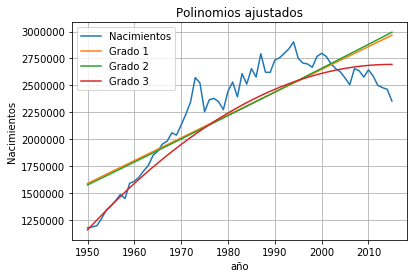

In [305]:
plt.figure()
plt.title("Polinomios ajustados")
plt.plot(x,y,label="Nacimientos")
plt.plot(x,X@beta,label="Grado 1")
plt.plot(x,X2@beta2,label="Grado 2")
plt.plot(x,X3@beta3,label="Grado 3")
plt.legend(loc="best")
plt.xlabel("año")
plt.ylabel("Nacimientos")
plt.grid()

In [307]:
error=np.array([soln1.fun,soln2.fun,soln3.fun])
en=np.reshape(error,[3,1])
en

array([[4.75207620e+12],
       [4.85210549e+12],
       [2.50438321e+12]])

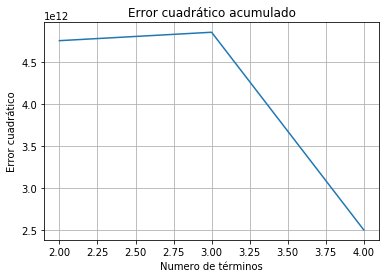

In [308]:
plt.figure()
plt.plot(nt,en)
plt.title("Error cuadrático acumulado")
plt.xlabel("Numero de términos")
plt.ylabel("Error cuadrático")
plt.grid()

In [312]:
soln1.fun<soln2.fun


True

In [311]:
soln3.fun<soln2.fun

True

**MEJOR AJUSTE**

El mejor ajuste para los datos de nacimientos es de grado 3